Imported Dataset From **Kaggle**
Tools and Libraries used
Brain tumor detection project uses the below libraries and frameworks:

Python – 3.x ,
TensorFlow – 2.4.1,
Keras – 2.4.0,
Numpy – 1.19.2,
Scikit-learn – 0.24.1,
Matplotlib – 3.3.4,
OpenCV – 4.5.2

***Steps:***
1.   Perform Exploratory Data Analysis (EDA) on brain tumor dataset
2.   Build a CNN model
3.   Train and Evaluate model on the dataset



In [ ]:
import kagglehub
from imutils import paths
import matplotlib.pyplot as plt
import argparse
import os
import cv2

In [8]:
# Download latest version of the Dataset and Load the images directories
path = kagglehub.dataset_download("navoneel/brain-mri-images-for-brain-tumor-detection")
image_paths = list(paths.list_images(path))
print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/navoneel/brain-mri-images-for-brain-tumor-detection/versions/1


In [10]:
images = []
labels = []

for image_path in image_paths:
    label = image_path.split(os.path.sep)[-2]
    image = cv2.imread(image_path)
    image = cv2.resize(image, (224, 224))

    images.append(image)
    labels.append(label)

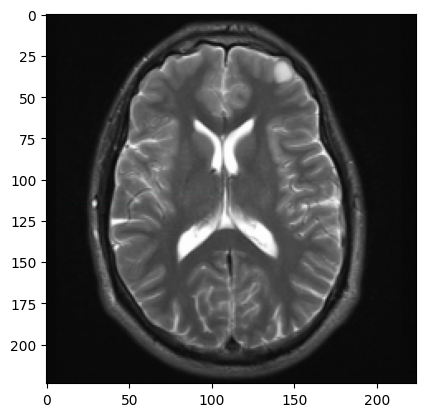

In [11]:
def plot_image(image):
    plt.imshow(image)

plot_image(images[0])

Apply one-hot encoding for labels and normalization

In [12]:
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical
import numpy as np

images = np.array(images) / 255.0
labels = np.array(labels)

label_binarizer = LabelBinarizer()
labels = label_binarizer.fit_transform(labels)
labels = to_categorical(labels)

In [13]:
from sklearn.model_selection import train_test_split

(train_X, test_X, train_Y, test_Y) = train_test_split(images, labels, test_size= 0.10, random_state= 42, stratify= labels)

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(fill_mode= 'nearest', rotation_range= 15)

Using the VGG16 (Transformer Model)

In [16]:
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.applications import VGG16

base_model = VGG16(weights= 'imagenet', input_tensor= Input(shape = (224, 224, 3)), include_top= False)
base_input = base_model.input

base_output = base_model.output
base_output = AveragePooling2D(pool_size=(4, 4))(base_output)
base_output = Flatten(name="flatten")(base_output)
base_output = Dense(64, activation="relu")(base_output)
base_output = Dropout(0.5)(base_output)
base_output = Dense(2, activation="softmax")(base_output)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [17]:
for layer in base_model.layers:
    layer.trainable = False

In [18]:
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

model = Model(inputs = base_input, outputs = base_output)
model.compile(optimizer= Adam(learning_rate= 1e-3), metrics= ['accuracy'], loss= 'binary_crossentropy')

In [19]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 1, 1, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 14,747,650 (56.26 MB)

 Trainable params: 32,962 (128.76 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [20]:
batch_size = 8
train_steps = len(train_X) // batch_size
validation_steps = len(test_X) // batch_size
epochs = 10

In [23]:
history = model.fit(
    train_generator.flow(train_X, train_Y, batch_size=batch_size),
    steps_per_epoch=train_steps,
    validation_data=(test_X, test_Y),
    # Removing validation_steps
    validation_steps=None,
    epochs=epochs
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


56/56 ━━━━━━━━━━━━━━━━━━━━ 325s 6s/step - accuracy: 0.6853 - loss: 0.6295 - val_accuracy: 0.7255 - val_loss: 0.5783
Epoch 2/10
 1/56 ━━━━━━━━━━━━━━━━━━━━ 6:56 8s/step - accuracy: 0.8750 - loss: 0.5010

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


56/56 ━━━━━━━━━━━━━━━━━━━━ 49s 745ms/step - accuracy: 0.8750 - loss: 0.5010 - val_accuracy: 0.7255 - val_loss: 0.5779
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 314s 6s/step - accuracy: 0.7528 - loss: 0.5487 - val_accuracy: 0.7843 - val_loss: 0.5342
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 37s 568ms/step - accuracy: 0.7500 - loss: 0.5684 - val_accuracy: 0.7843 - val_loss: 0.5333
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 312s 6s/step - accuracy: 0.8182 - loss: 0.5002 - val_accuracy: 0.7647 - val_loss: 0.5121
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 35s 562ms/step - accuracy: 0.6250 - loss: 0.6781 - val_accuracy: 0.7647 - val_loss: 0.5111
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 356s 6s/step - accuracy: 0.8007 - loss: 0.4628 - val_accuracy: 0.7843 - val_loss: 0.4846
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 45s 745ms/step - accuracy: 0.8750 - loss: 0.3541 - val_accuracy: 0.7843 - val_loss: 0.4847
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 325s 6s/step - accuracy: 0.8352 - loss: 0.4199 - val_accuracy: 0.6863 - val_

In [24]:
from sklearn.metrics import classification_report, confusion_matrix

predictions = model.predict(test_X, batch_size= batch_size)
predictions = np.argmax(predictions, axis= 1)
actuals = np.argmax(test_Y, axis= 1)

print(classification_report(actuals, predictions, target_names= label_binarizer.classes_))

cm = confusion_matrix(actuals, predictions)
print(cm)

7/7 ━━━━━━━━━━━━━━━━━━━━ 31s 4s/step
              precision    recall  f1-score   support

          no       0.59      0.80      0.68        20
         yes       0.83      0.65      0.73        31

    accuracy                           0.71        51
   macro avg       0.71      0.72      0.70        51
weighted avg       0.74      0.71      0.71        51

[[16  4]
 [11 20]]


In [25]:
total = sum(sum(cm))
accuracy = (cm[0, 0] + cm[1, 1]) / total
print("Accuracy: {:.4f}".format(accuracy))

Accuracy: 0.7059


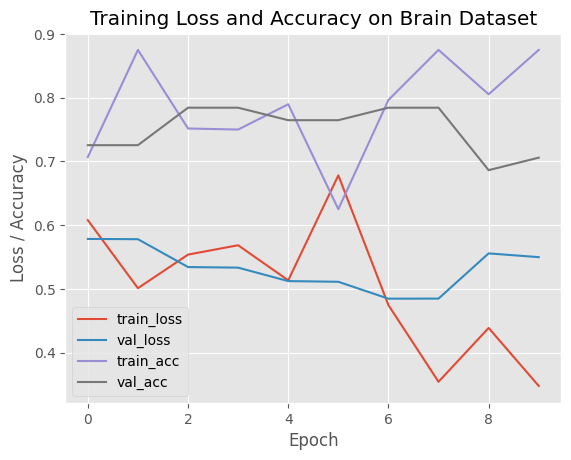

In [26]:
N = epochs
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label= "train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label= "val_loss")

plt.plot(np.arange(0, N), history.history["accuracy"], label= "train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label= "val_acc")

plt.title("Training Loss and Accuracy on Brain Dataset")
plt.xlabel("Epoch")
plt.ylabel("Loss / Accuracy")
plt.legend(loc= "lower left")
plt.savefig("plot.jpg")